DATASET CLEANING

The main objective of this part are:
1. Get familliar with the datasaet
2. Discover data quality problems
3. Fix these problems

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [179]:
df = pd.read_csv('raw_data.csv', sep= ';')
print(df.shape)
print(df.columns)
df.head(20)

(12276, 123)
Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA PROFILING

Let's visualise the amount of missing data with some plots

In [180]:
df.isna().sum()

gameid                  0
datacompleteness        0
url                 10032
league                  0
year                    0
                    ...  
assistsat15          2244
deathsat15           2244
opp_killsat15        2244
opp_assistsat15      2244
opp_deathsat15       2244
Length: 123, dtype: int64

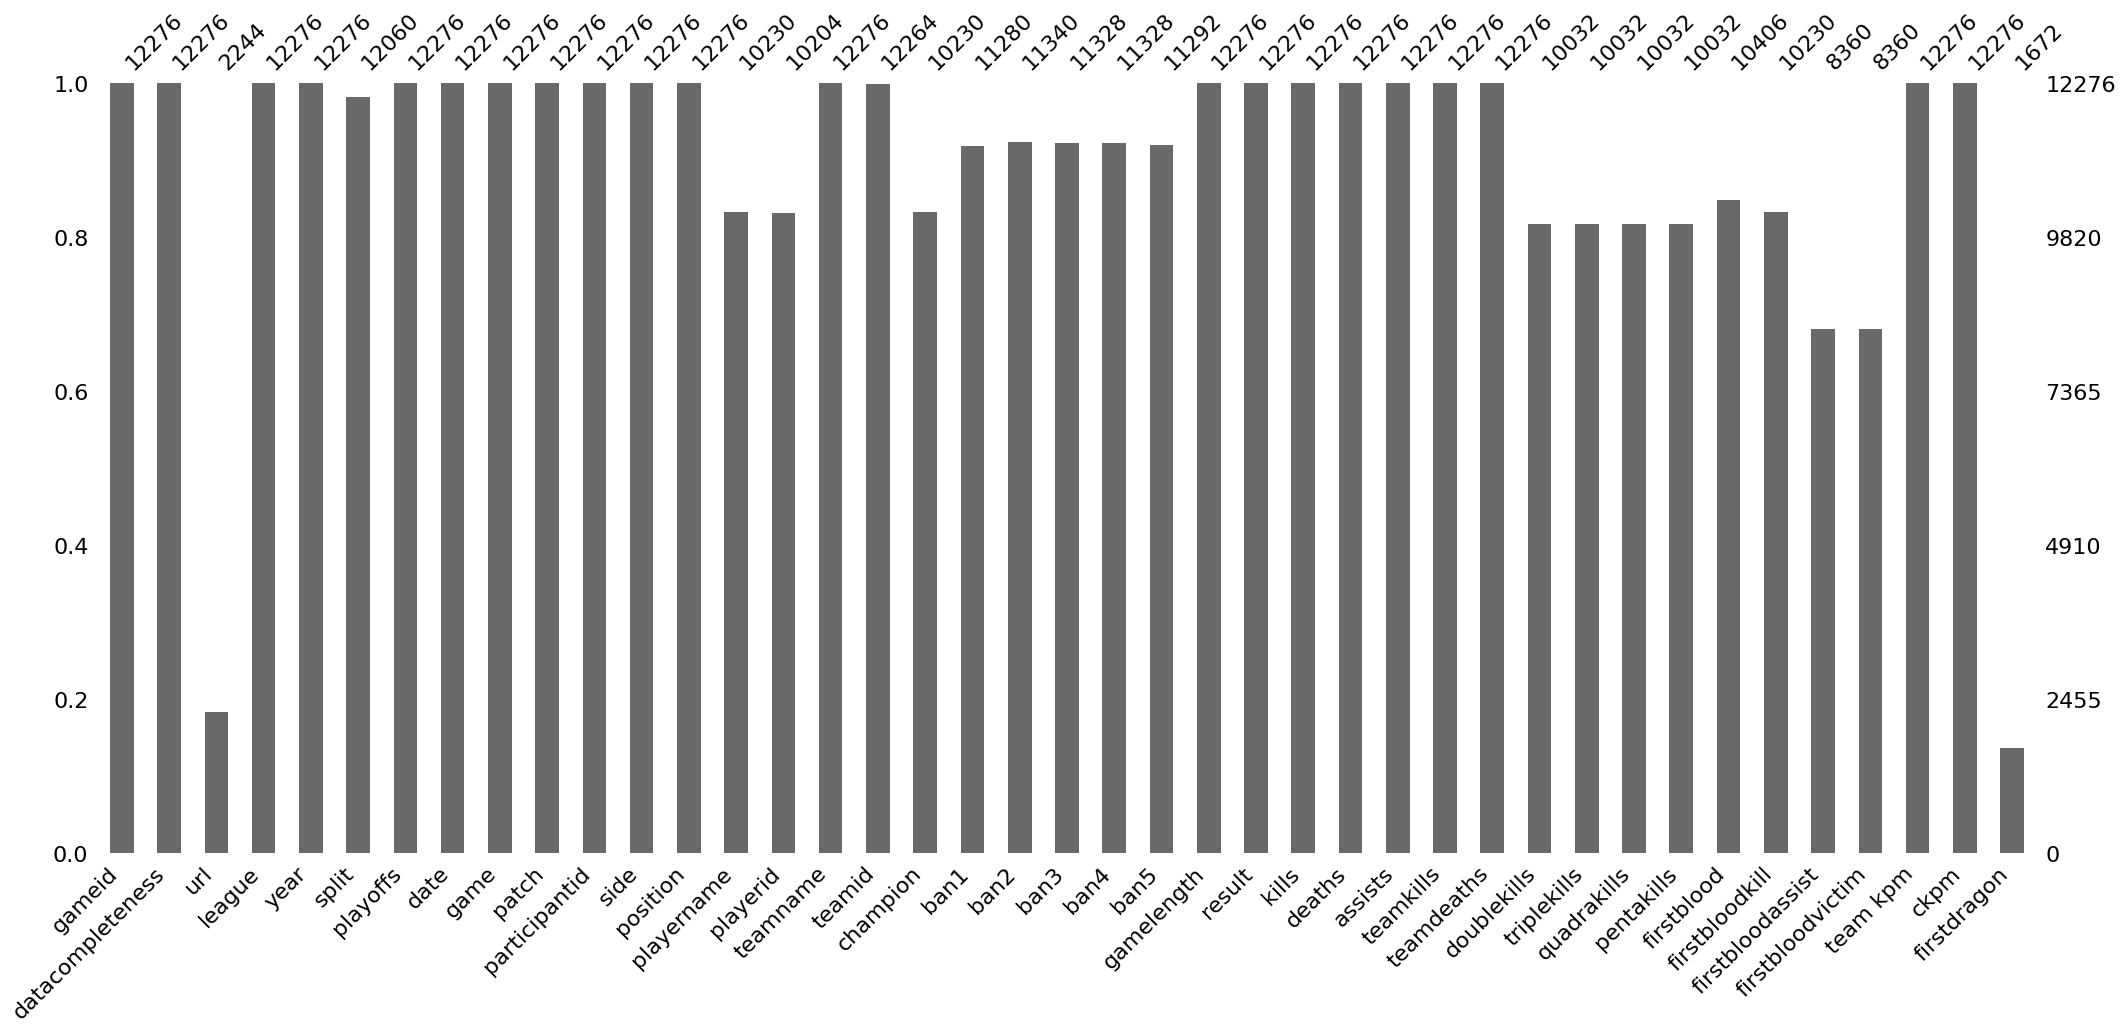

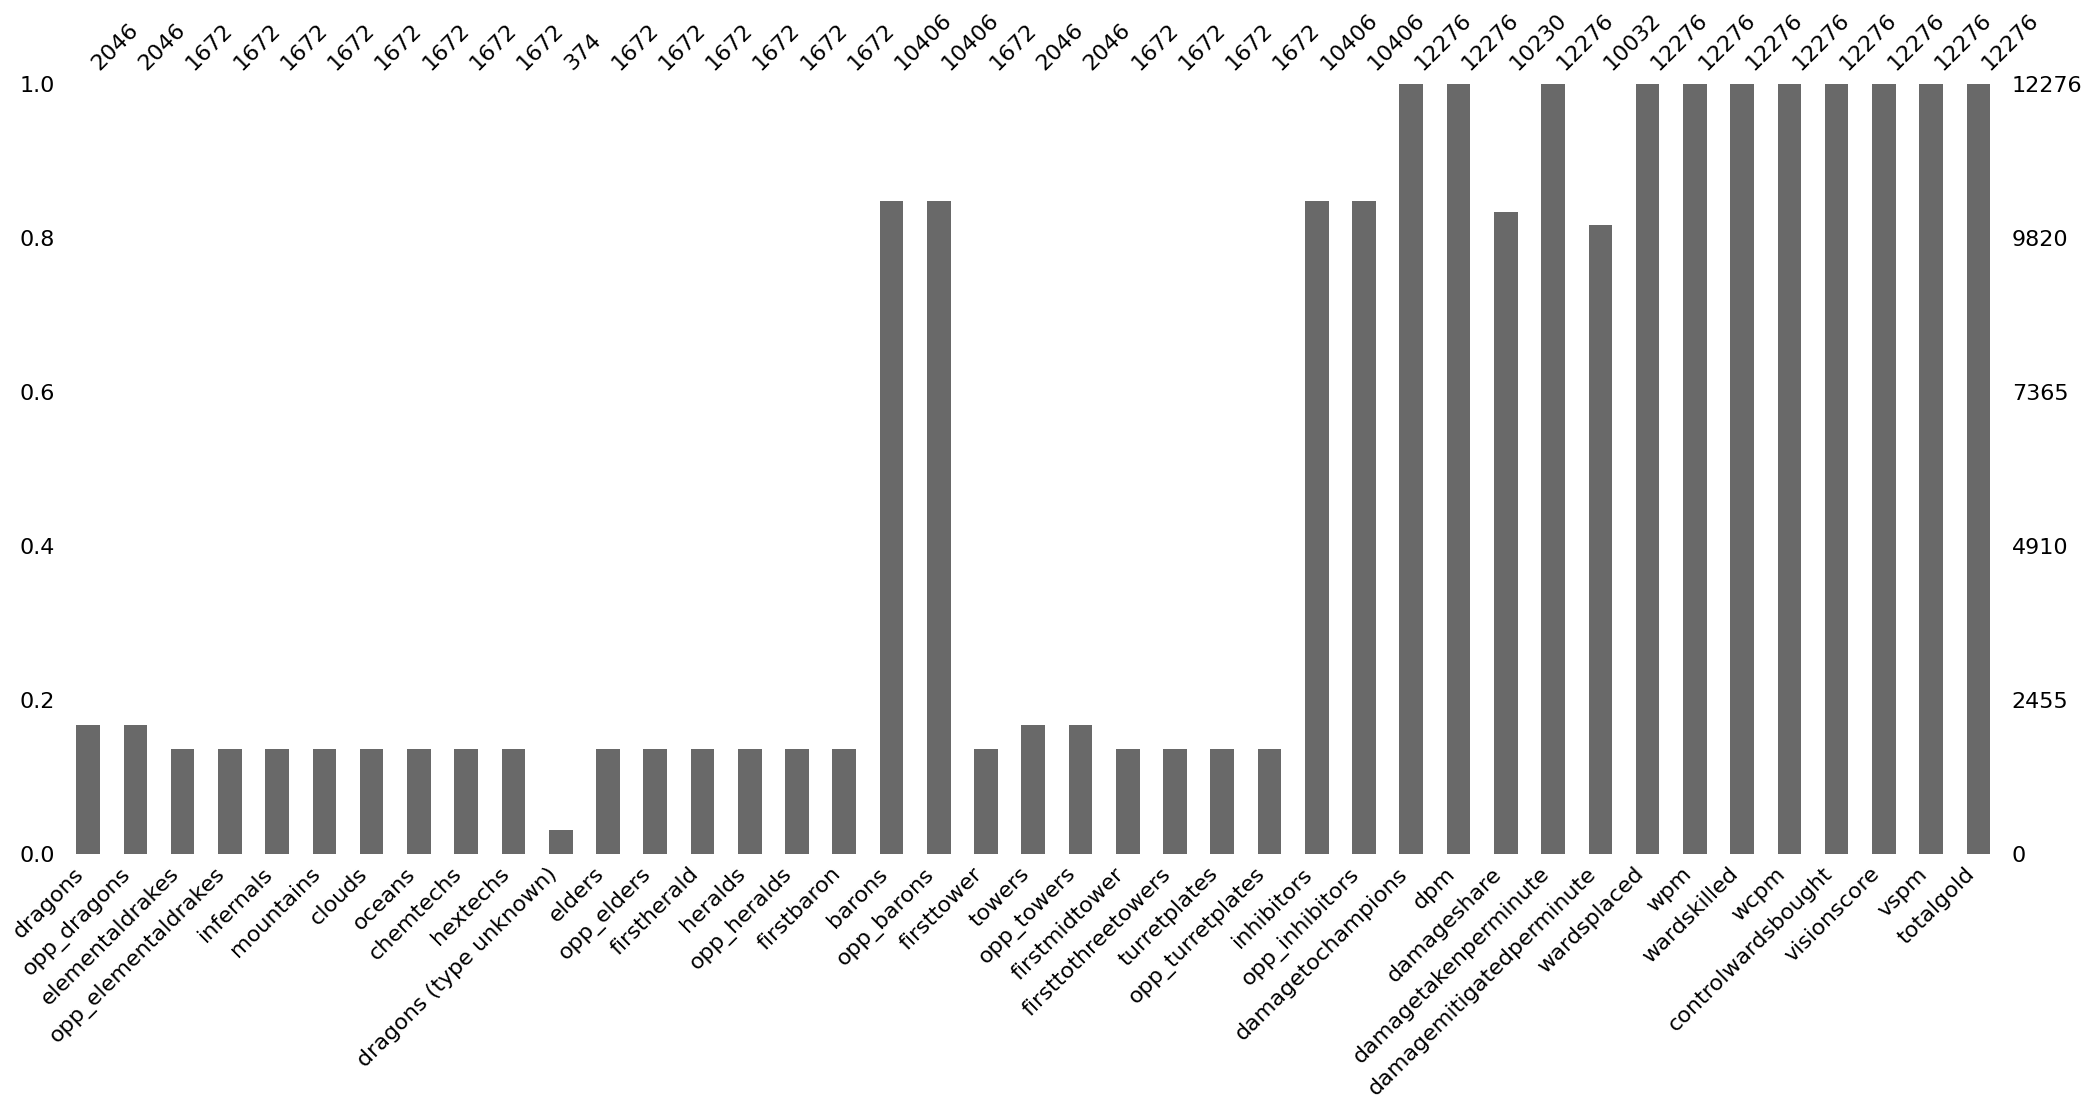

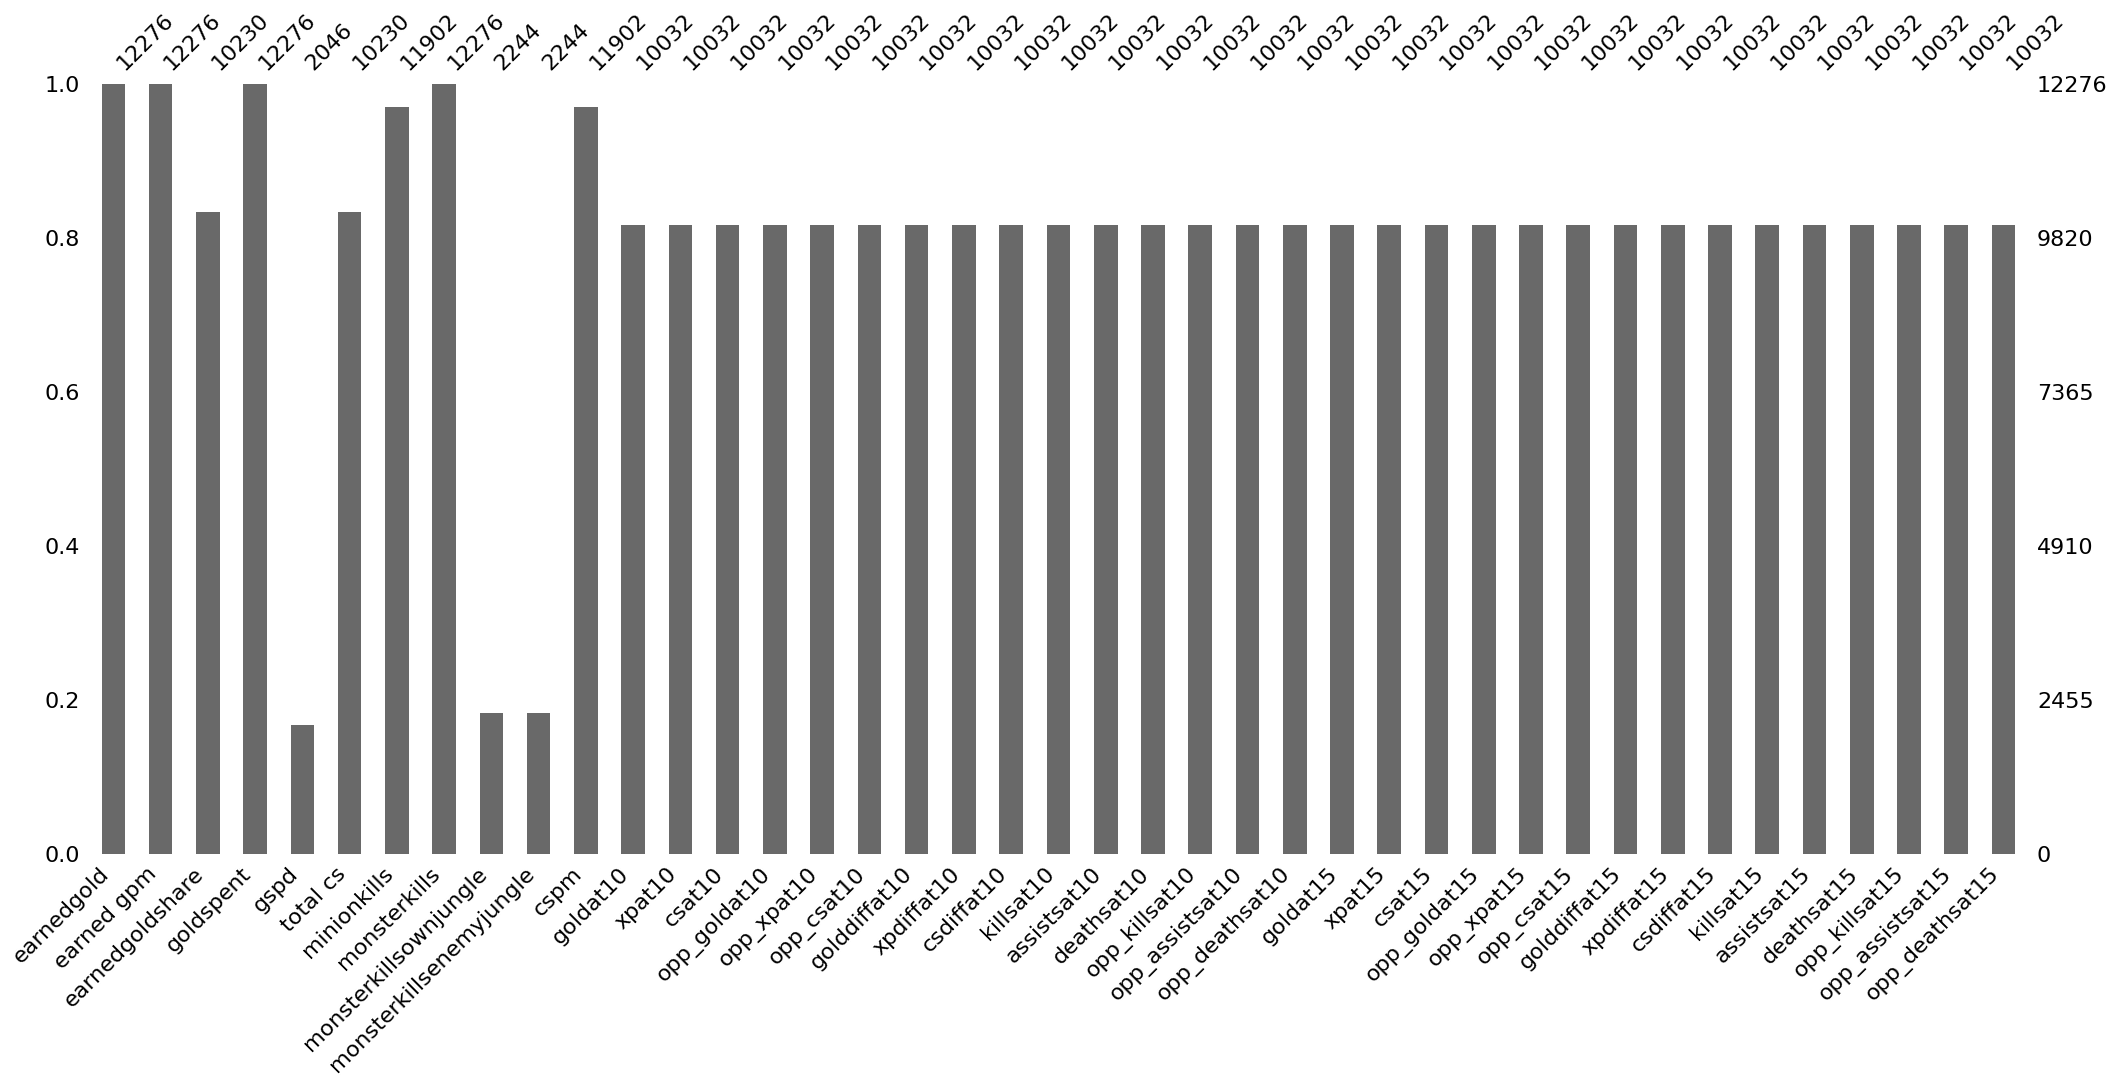

In [181]:
msno.bar(df.iloc[:, 0:41])
plt.show()
msno.bar(df.iloc[:, 41:82])
plt.show()
msno.bar(df.iloc[:, 82:])
plt.show()

Observations

1. There's a lot of missing values
2. The rows for individual players can be removved as there are 
3. Luckily, the columns that are the most promising are either complete or 80% complete
4. There's a lot of columns that represent different side of the same coin (ie. kills, deaths)

Impact
1. Drop metadata colums and not-impactful stats
2. Drop non-team rows
3. Impute the missing values for the variables "cspm", "xpat15" and "goldat15"

In [182]:
df_teams = df[df['position'] == 'team']
df_teams.head()
df_teams['position'].value_counts()

position
team    2046
Name: count, dtype: int64

In [183]:
df_teams = df_teams[['side', 'teamname', 'team kpm', 'dragons', 'barons', 'towers', 'dpm', 'vspm', 'earned gpm', 'cspm', 'xpat15', 'goldat15', 'result']]
df_teams = df_teams.reset_index()
df_teams.drop(columns='index', inplace=True)
df_teams.head(20)

,side,teamname,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,cspm,xpat15,goldat15,result
0,Blue,LNG Esports,0.0954,2.0,0.0,2.0,1329.8303,7.9533,931.8770,NaN,NaN,NaN,0
1,Red,Rare Atom,0.5090,3.0,2.0,9.0,1811.5164,8.8123,1308.2291,NaN,NaN,NaN,1
2,Blue,LNG Esports,0.0942,0.0,0.0,2.0,1708.6970,7.4097,900.5338,NaN,NaN,NaN,0
3,Red,Rare Atom,0.5338,4.0,1.0,9.0,1974.8195,9.8587,1342.3234,NaN,NaN,NaN,1
4,Blue,LNG Esports,0.9517,2.0,1.0,10.0,2747.7190,7.3414,1640.8459,NaN,NaN,NaN,1
5,Red,Rare Atom,0.1360,1.0,0.0,0.0,1568.8822,6.1631,717.2356,NaN,NaN,NaN,0
6,Blue,Rare Atom,0.5020,2.0,1.0,10.0,2013.8976,8.8583,1330.0394,NaN,NaN,NaN,1
7,Red,LNG Esports,0.2657,4.0,0.0,3.0,1569.9803,7.7657,996.2008,NaN,NaN,NaN,0
8,Blue,JD Gaming,0.6021,4.0,0.0,7.0,3112.2251,10.0262,1231.8325,NaN,NaN,NaN,1
9,Red,Top Esports,0.5236,2.0,1.0,4.0,3221.6754,10.1309,1132.0681,NaN,NaN,NaN,0


In [184]:
for i in range(2, 5):
    df_teams.iloc[:, -i].fillna(df_teams.iloc[:, -i].mean(), inplace= True)
df_teams.head()

C:\Users\Jakub\AppData\Local\Temp\ipykernel_16200\32109295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_teams.iloc[:, -i].fillna(df_teams.iloc[:, -i].mean(), inplace= True)


,side,teamname,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,cspm,xpat15,goldat15,result
0,Blue,LNG Esports,0.0954,2.0,0.0,2.0,1329.8303,7.9533,931.8770,32.543244,29876.795455,25044.644737,0
1,Red,Rare Atom,0.5090,3.0,2.0,9.0,1811.5164,8.8123,1308.2291,32.543244,29876.795455,25044.644737,1
2,Blue,LNG Esports,0.0942,0.0,0.0,2.0,1708.6970,7.4097,900.5338,32.543244,29876.795455,25044.644737,0
3,Red,Rare Atom,0.5338,4.0,1.0,9.0,1974.8195,9.8587,1342.3234,32.543244,29876.795455,25044.644737,1
4,Blue,LNG Esports,0.9517,2.0,1.0,10.0,2747.7190,7.3414,1640.8459,32.543244,29876.795455,25044.644737,1


In [185]:
df_teams.isna().sum()

side          0
teamname      0
team kpm      0
dragons       0
barons        0
towers        0
dpm           0
vspm          0
earned gpm    0
cspm          0
xpat15        0
goldat15      0
result        0
dtype: int64

OUTLIERS

In [186]:
df_teams.describe()

,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,cspm,xpat15,goldat15,result
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,0.430054,2.288368,0.714076,6.089932,2276.223390,8.255433,1172.762997,32.543244,29876.795455,25044.644737,0.500000
std,0.231472,1.380242,0.749812,3.613845,535.174855,1.346664,194.648388,2.155161,1164.874089,1454.798467,0.500122
min,0.000000,0.000000,0.000000,0.000000,896.042200,4.202600,717.235600,25.246900,25644.000000,20802.000000,0.000000
25%,0.245825,1.000000,0.000000,3.000000,1882.623375,7.347300,1002.610200,31.296750,29244.250000,24138.000000,0.000000
50%,0.402300,2.000000,1.000000,7.000000,2247.892600,8.234250,1178.258200,32.543244,29876.795455,25044.644737,0.500000
75%,0.586050,3.000000,1.000000,9.000000,2645.497000,9.146750,1331.964050,33.741225,30549.750000,25699.000000,1.000000
max,1.475800,6.000000,4.000000,11.000000,4179.404300,12.277400,1655.011400,41.413900,34322.000000,32212.000000,1.000000


In [187]:
cols = ['team kpm',	'dragons',	'barons',	'towers',	'dpm',	'vspm',	'earned gpm',	'cspm',	'xpat15', 'goldat15']
for col in cols:
    Q1 = df_teams[col].quantile(0.25)
    Q3 = df_teams[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_teams = df_teams[(df_teams[col] >= lower_bound) & (df_teams[col] <= upper_bound)]

df_teams.describe()

,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,cspm,xpat15,goldat15,result
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.412403,2.269036,0.664975,5.917090,2244.510549,8.263342,1159.838008,32.556541,29858.714236,24897.630755,0.478849
std,0.219272,1.373456,0.697866,3.559778,514.023096,1.292189,183.436620,1.819332,939.627708,1131.952841,0.499693
min,0.000000,0.000000,0.000000,0.000000,896.042200,4.783200,717.235600,27.751600,27422.000000,21979.000000,0.000000
25%,0.234400,1.000000,0.000000,3.000000,1865.993100,7.372900,1001.275100,31.476700,29307.000000,24141.000000,0.000000
50%,0.384600,2.000000,1.000000,7.000000,2219.420000,8.246400,1150.358700,32.543244,29876.795455,25044.644737,0.000000
75%,0.567100,3.000000,1.000000,9.000000,2594.781600,9.140400,1318.542700,33.651900,30399.000000,25473.000000,1.000000
max,1.094200,6.000000,2.000000,11.000000,3680.572900,11.828200,1640.845900,37.348200,32339.000000,27848.000000,1.000000


It seems like the dataset didn't contain any outliers

That's all for the data cleaning part, now let's move to the data transformation

In [188]:
#delete the first col
df_teams.to_csv('teams_data.csv')